In [1]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import Pool, CatBoostRegressor
import lightgbm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import gc
import os

import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab_Files/WildBlueberryPollinationSimulationData.csv')

In [4]:
data.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [5]:
data.shape

(777, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [7]:
data.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [8]:
%%capture
!pip install pandas_profiling

In [9]:
!pip install pydantic==<version>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `pip install pydantic==<version>'


In [10]:
# from pandas_profiling import ProfileReport


# # Create a ProfileReport object
# profile = ProfileReport(data)

# # Generate the profiling report
# profile.to_file('report.html')  # This will generate an HTML report

# # Display the report if needed
# profile.to_widgets()

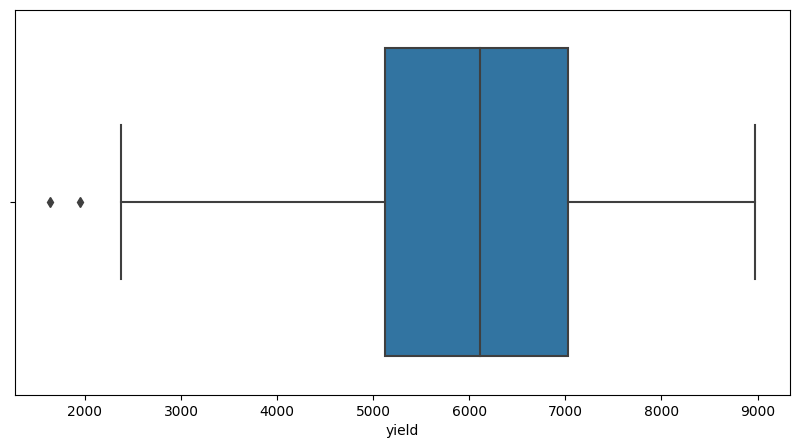

In [11]:
# plot the boxplot using seaborn library of the target variable 'yield'
plt.figure(figsize=(10,5))
sns.boxplot(x='yield', data=data)
plt.show()

In [12]:
data['yield'].describe()

count     777.000000
mean     6012.849165
std      1356.955318
min      1637.704022
25%      5124.854901
50%      6107.382466
75%      7022.189731
max      8969.401842
Name: yield, dtype: float64

In [13]:
data['yield_beyond_q75'] = np.where(
    data['yield'] >=data['yield'].quantile(q=0.75), 1, 0)

In [14]:
data['yield_beyond_q75'].value_counts()

0    582
1    195
Name: yield_beyond_q75, dtype: int64

In [15]:
np.sum(data.isnull())

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
yield_beyond_q75        0
dtype: int64

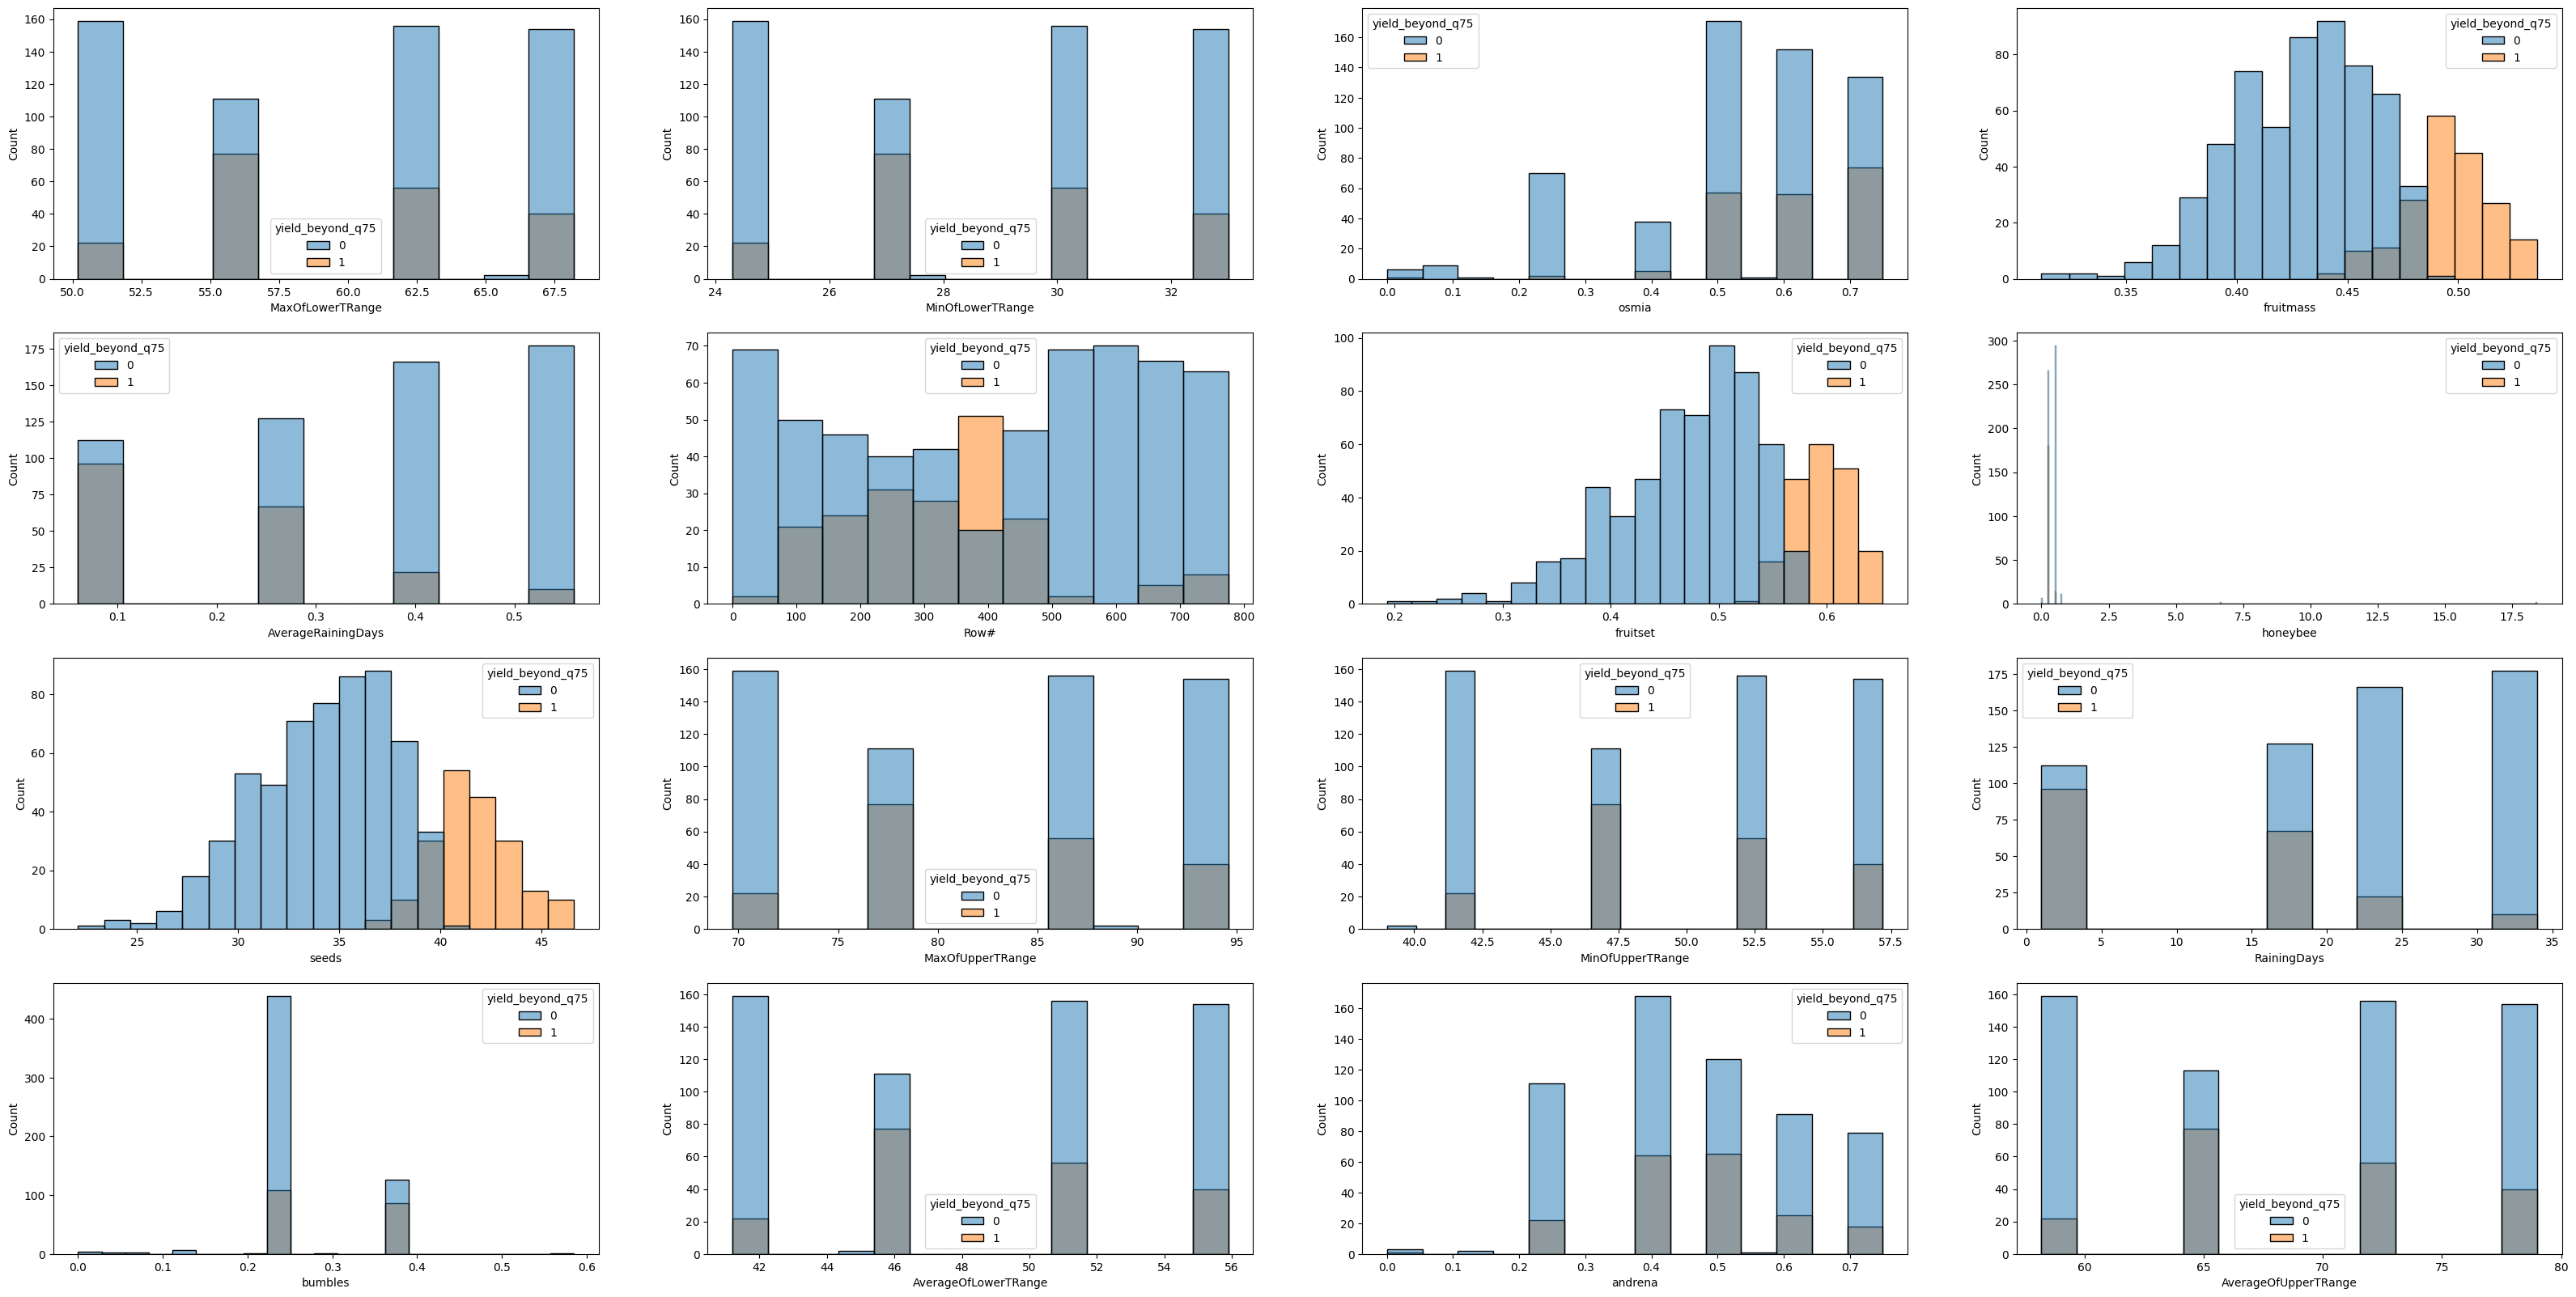

In [16]:
nrows = 4
ncols = 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(40, 20))
col_list = list(data.columns)
col_list = list(set(col_list) - set(['id', 'yield', 'yield_beyond_q75']))
col = 0

for i in range(nrows):
    for j in range(ncols):
        sns.histplot(data=data, x=col_list[col], hue='yield_beyond_q75', ax=axes[i, j])
        col = col + 1

<Axes: xlabel='AverageOfLowerTRange', ylabel='yield'>

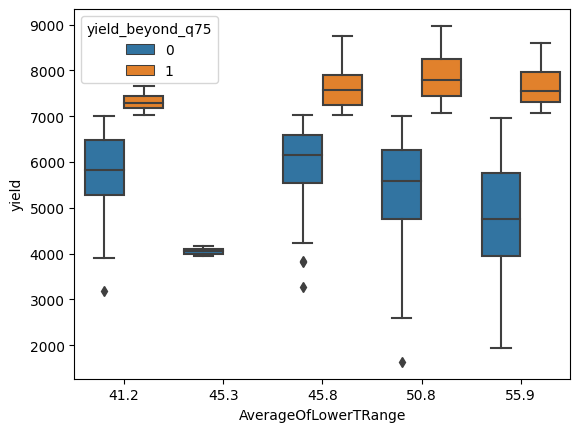

In [17]:
sns.boxplot(data=data, x="AverageOfLowerTRange", y="yield", hue='yield_beyond_q75')

<Axes: xlabel='AverageOfUpperTRange', ylabel='yield'>

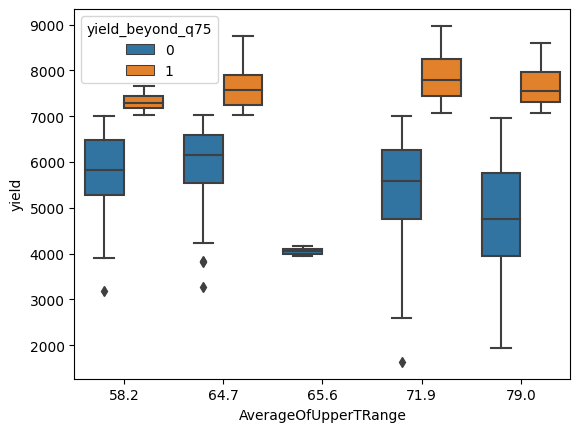

In [18]:
sns.boxplot(data=data, x="AverageOfUpperTRange", y="yield", hue='yield_beyond_q75')

<Axes: xlabel='AverageRainingDays', ylabel='yield'>

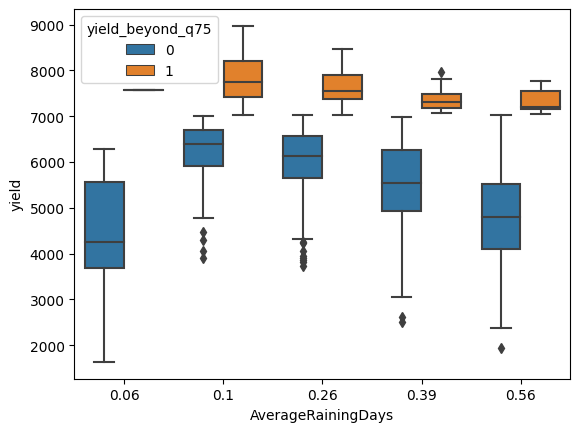

In [19]:
sns.boxplot(data=data, x="AverageRainingDays", y="yield", hue='yield_beyond_q75')

<Axes: xlabel='fruitmass', ylabel='fruitset'>

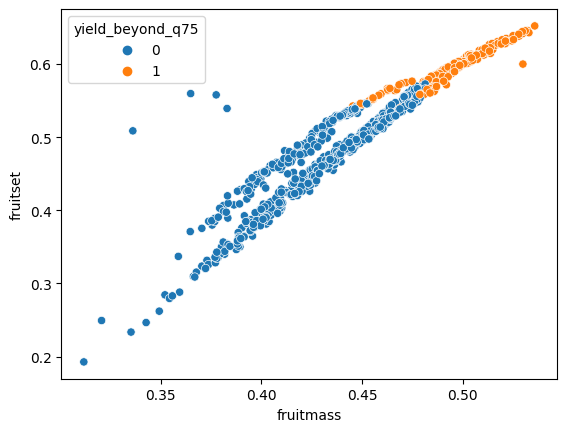

In [20]:
sns.scatterplot(data=data, x="fruitmass", y='fruitset', hue='yield_beyond_q75')

<Axes: xlabel='seeds', ylabel='yield'>

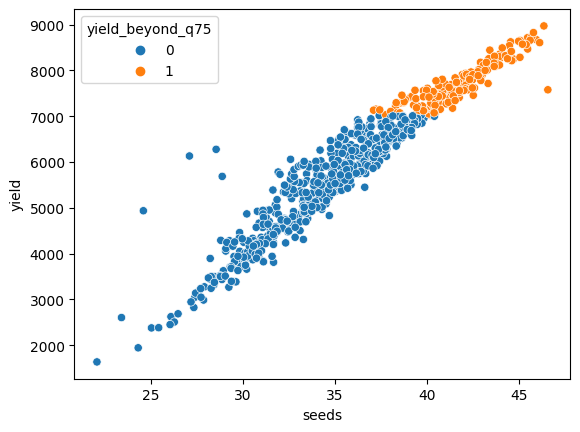

In [21]:
sns.scatterplot(data=data, x="seeds", y='yield', hue='yield_beyond_q75')

<Axes: >

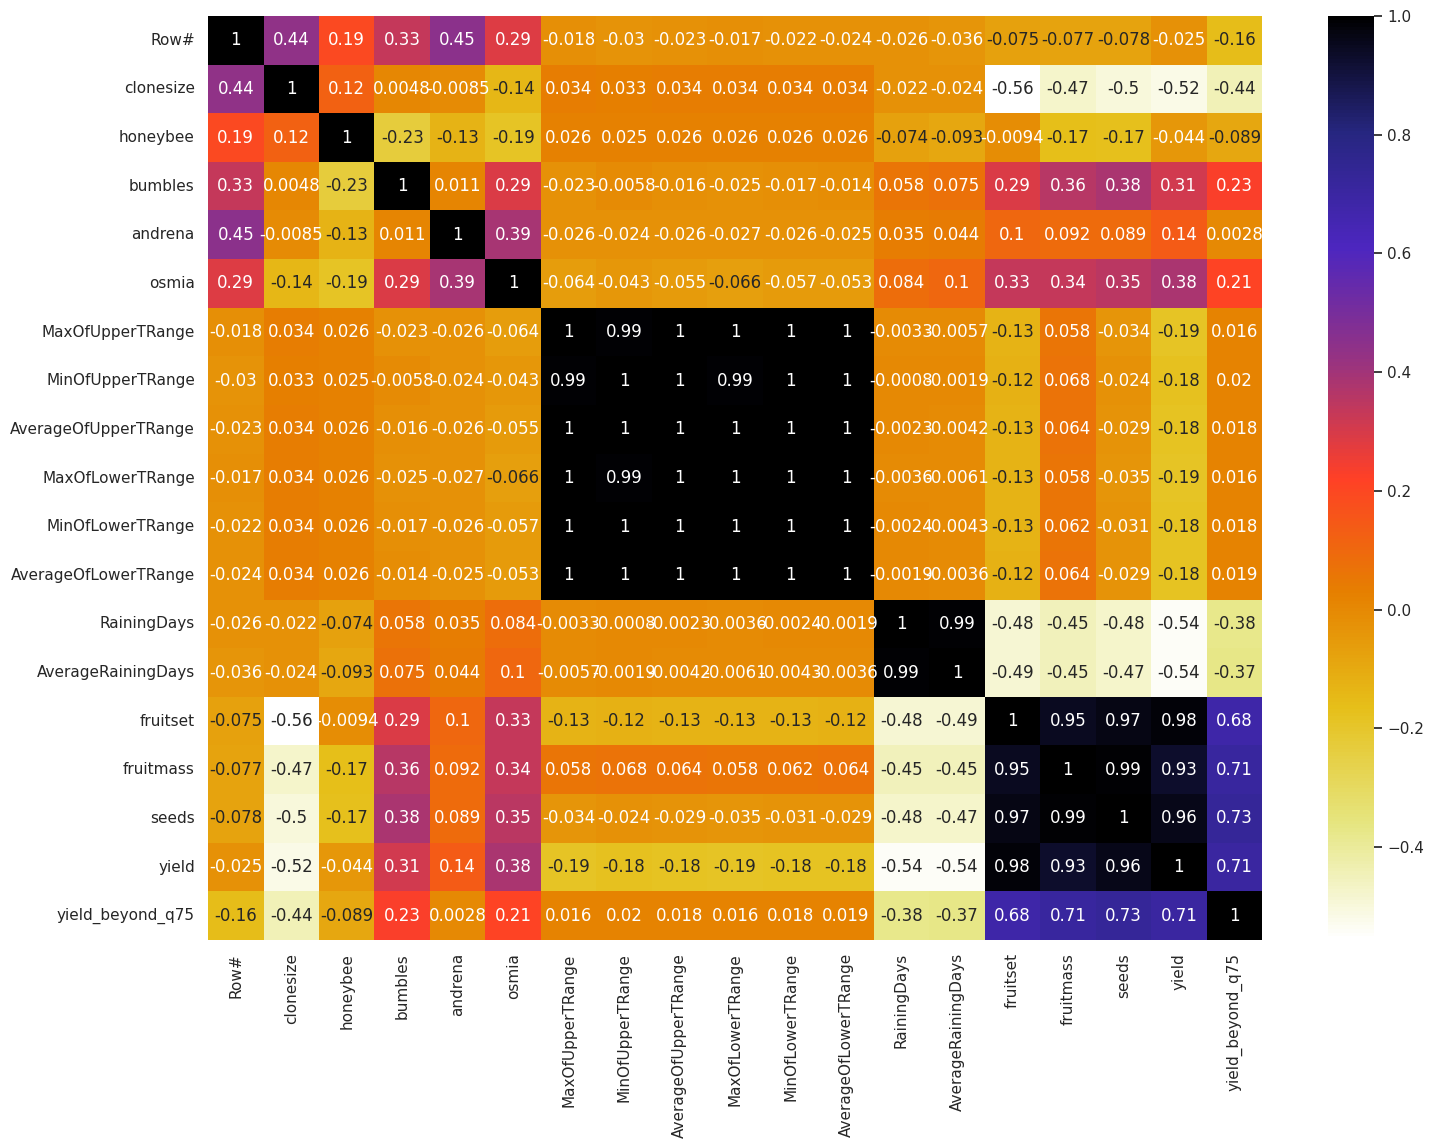

In [22]:
plt.figure(figsize=(17,12))
sns.set()
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [24]:
#splitting into independent and dependent features
X = data.drop(columns=['yield'])
y = data[['yield']]

In [25]:
#calculating Inter-quartile Range (IQR)
q1 = X.quantile(0.25)
q3 = X.quantile(0.75)
iqr = q3 -q1
print(iqr)

Row#                    388.000000
clonesize                12.500000
honeybee                  0.250000
bumbles                   0.130000
andrena                   0.250000
osmia                     0.250000
MaxOfUpperTRange         11.600000
MinOfUpperTRange          5.200000
AverageOfUpperTRange      7.200000
MaxOfLowerTRange         10.200000
MinOfLowerTRange          3.000000
AverageOfLowerTRange      5.000000
RainingDays              20.230000
AverageRainingDays        0.290000
fruitset                  0.106571
fruitmass                 0.059869
seeds                     6.123577
yield_beyond_q75          1.000000
dtype: float64


In [26]:
iqr_data = data[~((data < (q1 - 1.5 * iqr)) | (data> (q3 + 1.5 * iqr))).any(axis=1)]
iqr_data.shape

(752, 19)

In [27]:
iqr_data = iqr_data.reset_index().drop(["index"], axis=1)
iqr_data

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield,yield_beyond_q75
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795,0
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663,0
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965,0
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030,0
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,754,25.0,0.50,0.38,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.558394,0.478666,39.448650,7184.013843,1
748,755,25.0,0.50,0.38,0.63,0.50,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.494678,0.429703,34.784888,6292.960756,0
749,756,25.0,0.50,0.38,0.63,0.50,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.502842,0.430369,35.185971,6374.444297,0
750,757,25.0,0.50,0.38,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.513889,0.458966,37.209554,6180.951419,0


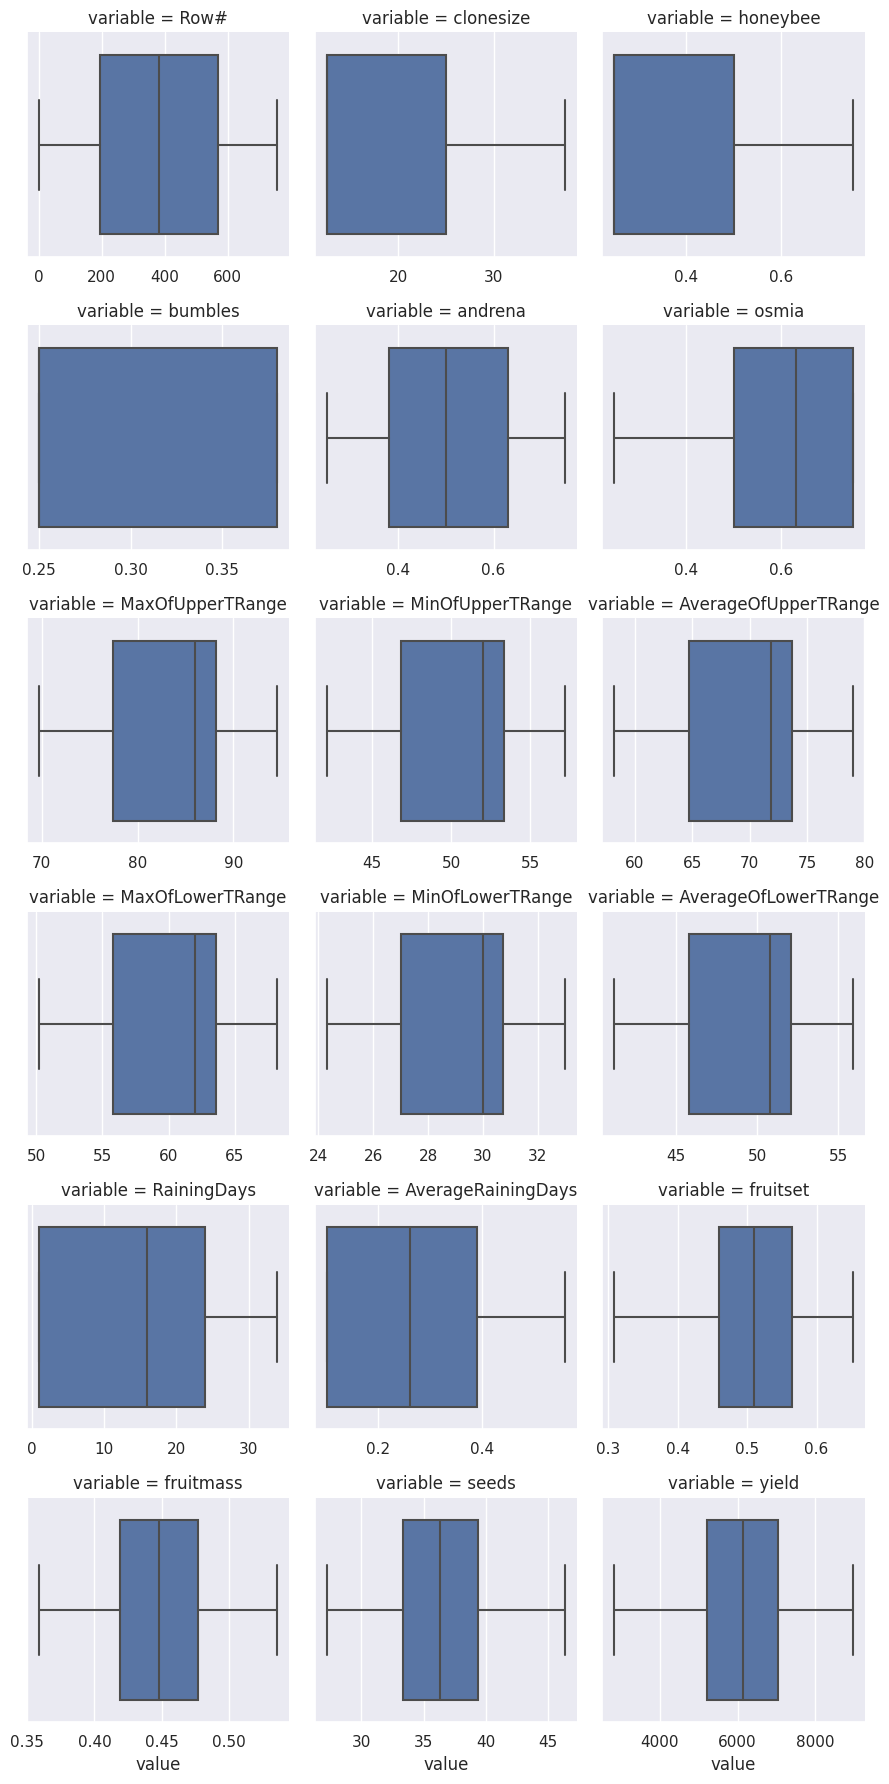

In [28]:
unpivot = pd.melt(iqr_data, iqr_data.describe().columns[-1], iqr_data.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

In [29]:
#splitting IQR processed data into independent and dependent features
X = iqr_data.drop(columns=['yield'])
y = iqr_data[['yield']]

In [30]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

In [31]:
def correlation(dataset, threshold):
    col_corr = set()  #Set of all the names of Correlated Columns
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]  #getting the name of the column
                col_corr.add(colname)
    return col_corr

In [32]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

10

In [33]:
corr_features = {'AverageOfLowerTRange',
 'AverageOfUpperTRange',
 'AverageRainingDays',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'MinOfUpperTRange',
 'honeybee'}
corr_features

{'AverageOfLowerTRange',
 'AverageOfUpperTRange',
 'AverageRainingDays',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'MinOfUpperTRange',
 'honeybee'}

In [34]:
X_train= X_train.drop(corr_features,axis=1)
X_test= X_test.drop(corr_features,axis=1)

In [35]:
X_train.shape

(601, 11)

Feature 0: 0.233338
Feature 1: 0.150027
Feature 2: 0.034829
Feature 3: 0.016573
Feature 4: 0.095969
Feature 5: 0.124945
Feature 6: 0.209084
Feature 7: 1.925528
Feature 8: 1.632590
Feature 9: 1.650936
Feature 10: 0.575652


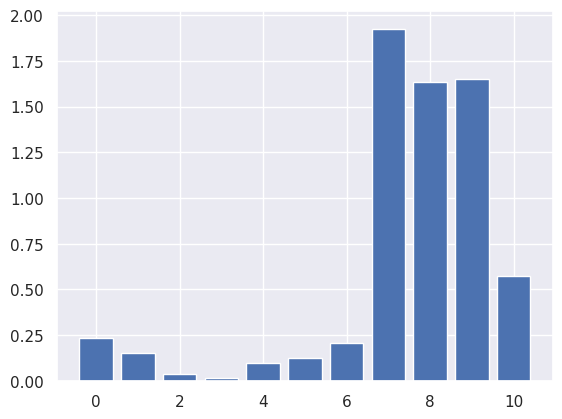

In [36]:
# Mutual Information feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# feature selection
def select_features_info_based(X_train, y_train, X_test):
	mutual_info = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	mutual_info.fit(X_train, y_train)
	# transform train input data
	X_train_fs = mutual_info.transform(X_train)
	# transform test input data
	X_test_fs = mutual_info.transform(X_test)
	return X_train_fs, X_test_fs, mutual_info


# Feature Selection
X_train_fs, X_test_fs, fs_info = select_features_info_based(X_train, y_train, X_test)
fs_info
# what are scores for the features
for i in range(len(fs_info.scores_)):
	print('Feature %d: %f' % (i, fs_info.scores_[i]))
# plotting the scores
plt.bar([i for i in range(len(fs_info.scores_))], fs_info.scores_)
plt.show()

Feature 0: 0.007120
Feature 1: 181.436566
Feature 2: 50.396352
Feature 3: 6.262467
Feature 4: 80.579273
Feature 5: 13.139621
Feature 6: 291.735778
Feature 7: 19076.391809
Feature 8: 4263.896203
Feature 9: 9328.836779
Feature 10: 660.317838


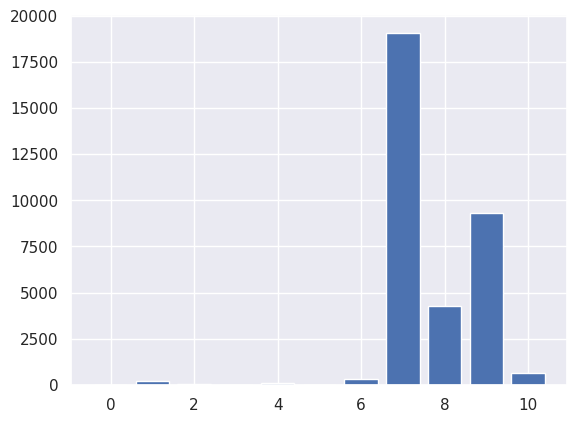

In [37]:
# Correlation feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Feature Selection
def select_features_corr_based(X_train, y_train, X_test):
	fs = SelectKBest(score_func=f_regression, k='all')
	# learning relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs_corr = select_features_corr_based(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs_corr.scores_)):
	print('Feature %d: %f' % (i, fs_corr.scores_[i]))
# plotting the scores
plt.bar([i for i in range(len(fs_corr.scores_))], fs_corr.scores_)
plt.show()

In [38]:
X_train_fs_model, X_test_fs_model, fs_info = select_features_info_based(X_train, y_train, X_test)


In [39]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_fs_model, y_train)
pred_linear = reg.predict(X_test_fs_model)

In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae_linear = mean_absolute_error(y_test, pred_linear)
mse_linear = mean_squared_error(y_test, pred_linear)
rmse_linear = np.sqrt(mse_linear)
rsq_linear = r2_score(y_test, pred_linear)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 85.853
MSE: 11569.404
RMSE: 107.561
R-Square: 0.993


In [41]:
from sklearn.ensemble import RandomForestRegressor

# Defining the model and stating the random state to 1
rf_model = RandomForestRegressor(random_state=1)

# fitting the model
rf_model.fit(X_train_fs_model, y_train)
pred_rf=rf_model.predict(X_test_fs_model)
pred_rf=pred_rf.reshape(151,1)

mae_rf = mean_absolute_error(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
rmse_rf = np.sqrt(mse_rf)
rsq_rf = r2_score(y_test, pred_rf)

print('MAE: %.3f' % mae_rf)
print('MSE: %.3f' % mse_rf)
print('RMSE: %.3f' % rmse_rf)
print('R-Square: %.3f' % rsq_rf)

MAE: 112.790
MSE: 19207.647
RMSE: 138.592
R-Square: 0.988


In [42]:
from sklearn.tree import DecisionTreeRegressor

dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_train_fs_model, y_train)
pred_dtree = dtree_reg.predict(X_test_fs_model)

mae_dtree = mean_absolute_error(y_test, pred_dtree)
mse_dtree = mean_squared_error(y_test, pred_dtree)
rmse_dtree = np.sqrt(mse_dtree)
rsq_dtree = r2_score(y_test, pred_dtree)

print('MAE: %.3f' % mae_dtree)
print('MSE: %.3f' % mse_dtree)
print('RMSE: %.3f' % rmse_dtree)
print('R-Square: %.3f' % rsq_dtree)

MAE: 166.871
MSE: 47121.182
RMSE: 217.074
R-Square: 0.971


In [43]:
!pip install xgboost

In [44]:
import xgboost
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train_fs_model, y_train)
pred_xgb = xgb_model.predict(X_test_fs_model)

mae_xgb = mean_absolute_error(y_test, pred_xgb)
mse_xgb = mean_squared_error(y_test, pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
rsq_xgb = r2_score(y_test, pred_xgb)

print('MAE: %.3f' % mae_xgb)
print('MSE: %.3f' % mse_xgb)
print('RMSE: %.3f' % rmse_xgb)
print('R-Square: %.3f' % rsq_xgb)

MAE: 109.954
MSE: 19060.315
RMSE: 138.059
R-Square: 0.988


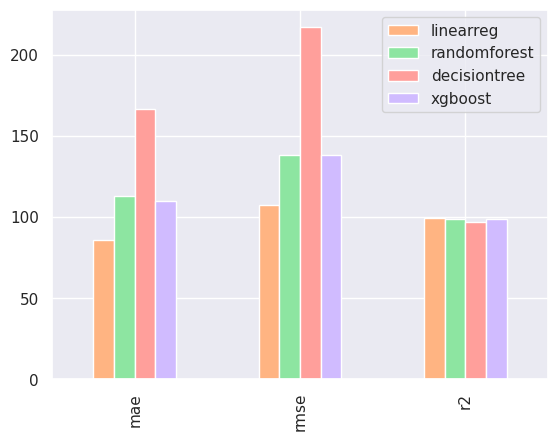

In [45]:
error_rec = {
    "linearreg": {
        "mae": mae_linear,
        "rmse": rmse_linear,
        'r2': rsq_linear*100
    },
    "randomforest": {
        "mae": mae_rf,
        "rmse": rmse_rf,
        'r2': rsq_rf*100
    },
    "decisiontree": {
        "mae": mae_dtree,
        "rmse": rmse_dtree,
        'r2': rsq_dtree*100
    },
    "xgboost": {
        "mae": mae_xgb,
        "rmse": rmse_xgb,
        'r2': rsq_xgb*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar",
             color=[
                 sns.color_palette("pastel")[1],
                 sns.color_palette("pastel")[2],
                 sns.color_palette("pastel")[3],
                 sns.color_palette("pastel")[4]]);

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


cv = RepeatedKFold(n_splits= 78,n_repeats = 3,random_state = 1)
fs_info_v0 = SelectKBest(score_func = mutual_info_regression)

# define pipeline for each algorithm
# define GSCV for each
# loop through it


pipe_lr = Pipeline([
    ('sel', fs_info_v0),
    ('model', LinearRegression())
])

pipe_rf = Pipeline([
    ('sel', fs_info_v0),
    ('model', RandomForestRegressor(random_state=1))
])

pipe_dtree = Pipeline([
    ('sel', fs_info_v0),
    ('model', DecisionTreeRegressor(random_state=1))
])

pipe_xgb = Pipeline([
    ('sel', fs_info_v0),
    ('model', XGBRegressor(random_state=1))
])

# pipe_lr.get_params().keys()

In [47]:
param_range = [15, 18, 10]
param_range_fl = [5.0, 10.0]

grid_params_lr = [{'sel__k': [i for i in range(X_train_fs_model.shape[1]-6, X_train_fs_model.shape[1]-4)],
        }]


grid_params_rf = [{'sel__k': [i for i in range(X_train_fs_model.shape[1]-6, X_train_fs_model.shape[1]-4)],
        'model__criterion': ['squared_error', 'absolute_error'],
#         'model__max_depth': param_range,
#         'model__min_samples_split': param_range[1:]
                  }]


grid_params_dtree = [{'sel__k': [i for i in range(X_train_fs_model.shape[1]-6, X_train_fs_model.shape[1]-4)],
                    'model__criterion': ['squared_error', 'absolute_error'],
#                      'model__max_depth': param_range,
#                      'model__max_features': ['auto', 'sqrt']
                     }]


grid_params_xgb = [{'sel__k': [i for i in range(X_train_fs_model.shape[1]-6, X_train_fs_model.shape[1]-4)],
#                     'model__max_depth': [9,12],
#                    'model__min_child_weight': [7,8],
                   'model__subsample': [i/10. for i in range(9,11)]
                   }]

LR = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='neg_mean_absolute_error',
            cv=cv)

RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='neg_mean_absolute_error',
            cv=cv,
            n_jobs= -1)

DT = GridSearchCV(estimator=pipe_dtree,
            param_grid=grid_params_dtree,
            scoring='neg_mean_absolute_error',
            cv=cv,
            n_jobs= -1)

XGB = GridSearchCV(estimator=pipe_xgb,
            param_grid=grid_params_xgb,
            scoring='neg_mean_absolute_error',
            cv=cv,
            n_jobs= -1)

grids = [LR,RF,XGB,DT]

# Creating a dict for our reference
grid_dict = {0: 'Logistic Regression',
        1: 'Random Forest',
        2: 'XGBoost',
        3: 'Decision Tree'}

In [48]:
def extract_best_model(grids: list, grid_dict: dict):
    print('Performing model optimizations...')
    least_mae = 270817
    best_regr = 0
    best_gs = ''
    for idx, gs in enumerate(grids):
        print('\nEstimator: %s' % grid_dict[idx])
        gs.fit(X_train_fs_model, y_train.values.ravel())
        print('Best Config: %s' % gs.best_params_)
        # Best training data accuracy
        print('Best MAE: %.3f' % gs.best_score_)
        # Predict on test data with best params
        y_pred_v0 = gs.predict(X_test_fs_model)
        # Test data accuracy of model with best params
        print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v0))
        print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v0)))

        # Track best (least test error) model
        if mean_absolute_error(y_test, y_pred_v0) < least_mae:
            least_mae = mean_absolute_error(y_test, y_pred_v0)
            best_gs = gs
            best_regr = idx
    print('\nClassifier with least test set MAE: %s' % grid_dict[best_regr])

    ## Save best grid search pipeline to file
    # dump_file = 'best_grid_search_pipeline.pkl'
    # joblib.dump(best_gs, dump_file, compress=1)
    # print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_regr], dump_file))

    ########### summarize all values of parameters (uncomment only if nescessary)
    ######### means = results.cv_results_['mean_test_score']
    ######## params = results.cv_results_['params']
    ####### for mean, param in zip(means, params):
    ###### print(">%.3f with: %r" % (mean, param))

    return (grid_dict[best_regr], best_gs, least_mae)


In [49]:
best_model_name_v0, best_model_v0, least_mae_v0 = extract_best_model(grids= grids, grid_dict = grid_dict)

print(f"Best Model: {best_model_name_v0}")
print(f"Error Rate: {least_mae_v0}")
print(best_model_v0)

Performing model optimizations...

Estimator: Logistic Regression
Best Config: {'sel__k': 6}
Best MAE: -108.245
Test set mean absolute error for best params: 99.491 
Test set root mean squared error for best params: 9.974 

Estimator: Random Forest
Best Config: {'model__criterion': 'squared_error', 'sel__k': 6}
Best MAE: -113.336
Test set mean absolute error for best params: 112.275 
Test set root mean squared error for best params: 10.596 

Estimator: XGBoost
Best Config: {'model__subsample': 0.9, 'sel__k': 6}
Best MAE: -116.300
Test set mean absolute error for best params: 122.333 
Test set root mean squared error for best params: 11.060 

Estimator: Decision Tree
Best Config: {'model__criterion': 'squared_error', 'sel__k': 5}
Best MAE: -149.636
Test set mean absolute error for best params: 150.588 
Test set root mean squared error for best params: 12.271 

Classifier with least test set MAE: Logistic Regression
Best Model: Logistic Regression
Error Rate: 99.49056128459017
GridSearch

In [51]:
grid_params_rf1 = [{
        'model__max_depth': param_range,
        'model__min_samples_split': [2,5]
                  }]

RF1 = GridSearchCV(
    estimator=Pipeline([
        ('sel', SelectKBest(score_func=mutual_info_regression, k=9)),
        ('model', RandomForestRegressor(random_state=1, criterion='squared_error'))
    ]),
    param_grid=grid_params_rf1,
    scoring='neg_mean_absolute_error',
    cv=cv,
    n_jobs=-1
)


print("Random Forest V-1 optimising...")
RF1.fit(X_train_fs_model, y_train)
print('Best Config: %s' % RF1.best_params_)
print('Best MAE: %.3f' % RF1.best_score_)
y_pred_v1_rf1 = RF1.predict(X_test_fs_model)
print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v1_rf1))
print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v1_rf1)))

Random Forest V-1 optimising...
Best Config: {'model__max_depth': 10, 'model__min_samples_split': 2}
Best MAE: -110.892
Test set mean absolute error for best params: 111.083 
Test set root mean squared error for best params: 10.540 


In [52]:
#saving the model
import joblib
# Save the random forest grid search pipleline for backup
dump_file_name1 = 'randomforest_blueberry_pollination_tuned_model.joblib'
joblib.dump(RF1, dump_file_name1, compress=1)
print('\nSaved %s tuned model to directory by name: %s' % ("Random Forest", dump_file_name1))


Saved Random Forest tuned model to directory by name: randomforest_blueberry_pollination_tuned_model.joblib


In [53]:
pd.DataFrame(X_test_fs_model).to_csv("X_test_rf_df.csv")
print("\nSaved X_test for RF to CSV")

# # Save final training dataset for backup
joblib.dump(X_train_fs_model, "X_train_rf.joblib")
print("\n Saved X_train for RF to joblib file")


Saved X_test for RF to CSV

 Saved X_train for RF to joblib file


In [54]:
joblib.dump(y_test, "y_test.joblib", compress=1)
print("\nSaved y_test to joblib file")


Saved y_test to joblib file
